## Import Library

In [1]:
# import library
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, Flatten, Dropout
from sklearn.model_selection import train_test_split
from keras.regularizers import l2

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [3]:
# load data
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = df['label']
data = df.drop(['label'], axis = 1)
data.shape

(42000, 784)

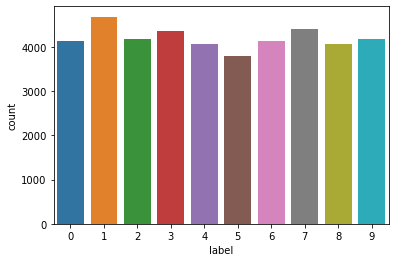

In [5]:
# plot the labels
import seaborn as sns
sns.countplot(x=Y)

In [6]:
# convert to categorical
from keras.utils import to_categorical
Y_input = to_categorical(Y, num_classes = 10)
print(Y_input.shape)
Y_input

(42000, 10)


array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [7]:
# Standarize the data
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
s_clf = s.fit(data)
data_s = s.transform(data)

In [8]:
# reshape to images(28*28)
data_input = data_s.reshape(42000, 28, 28, 1)

In [9]:
# create model
def create_model():
    model = Sequential()
    
    model.add(Conv2D(32, input_shape = (28, 28, 1), kernel_size = (3,3), strides = (1, 1), padding ='same',  kernel_initializer='he_uniform'))
    model.add(LeakyReLU(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(0.20))
    
    model.add(Conv2D(64, (3, 3), padding = 'same', strides =(1, 1), kernel_initializer='he_uniform' ))
    model.add(LeakyReLU(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), padding = 'same', strides =(1, 1),kernel_initializer='he_uniform' ))
    model.add(LeakyReLU(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(0.30))

    
    model.add(Flatten())
    
    model.add(Dense(250, kernel_initializer='he_uniform', ))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.25))
    
    model.add(Dense(100, kernel_initializer='he_uniform', ))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.30))
    
    model.add(Dense(10,kernel_initializer='he_uniform', activation = 'sigmoid'))
    
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adamax')
    return model

In [10]:
# Model creation
model = create_model()
# train-test-split
x_train, x_val, y_train, y_val = train_test_split(data_input, Y_input, test_size = 0.15)

In [11]:
# mode; checkpoint to save best model
mc = tf.keras.callbacks.ModelCheckpoint('model_tuned.h5', monitor='val_loss', verbose=0, save_best_only=True, mode='max')

In [12]:
# fit model
history = model.fit(x_train,y_train, batch_size=64, epochs = 103, validation_data = (x_val,y_val),callbacks = [mc])

Epoch 1/103
558/558 [==============================] - 4s 7ms/step - loss: 1.0606 - accuracy: 0.6572 - val_loss: 0.1917 - val_accuracy: 0.9537
Epoch 2/103
558/558 [==============================] - 3s 5ms/step - loss: 0.2917 - accuracy: 0.9182 - val_loss: 0.0813 - val_accuracy: 0.9756
Epoch 3/103
558/558 [==============================] - 3s 5ms/step - loss: 0.1803 - accuracy: 0.9487 - val_loss: 0.0595 - val_accuracy: 0.9824
Epoch 4/103
558/558 [==============================] - 3s 6ms/step - loss: 0.1377 - accuracy: 0.9605 - val_loss: 0.0490 - val_accuracy: 0.9843
Epoch 5/103
558/558 [==============================] - 3s 5ms/step - loss: 0.1146 - accuracy: 0.9672 - val_loss: 0.0486 - val_accuracy: 0.9844
Epoch 6/103
558/558 [==============================] - 3s 5ms/step - loss: 0.0957 - accuracy: 0.9733 - val_loss: 0.0378 - val_accuracy: 0.9883
Epoch 7/103
558/558 [==============================] - 3s 5ms/step - loss: 0.0836 - accuracy: 0.9770 - val_loss: 0.0363 - val_accuracy: 0.9889

Epoch 58/103
558/558 [==============================] - 3s 5ms/step - loss: 0.0139 - accuracy: 0.9959 - val_loss: 0.0296 - val_accuracy: 0.9941
Epoch 59/103
558/558 [==============================] - 3s 5ms/step - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.0296 - val_accuracy: 0.9937
Epoch 60/103
558/558 [==============================] - 3s 5ms/step - loss: 0.0154 - accuracy: 0.9955 - val_loss: 0.0287 - val_accuracy: 0.9933
Epoch 61/103
558/558 [==============================] - 4s 7ms/step - loss: 0.0127 - accuracy: 0.9957 - val_loss: 0.0337 - val_accuracy: 0.9940
Epoch 62/103
558/558 [==============================] - 3s 5ms/step - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.0302 - val_accuracy: 0.9941
Epoch 63/103
558/558 [==============================] - 3s 6ms/step - loss: 0.0136 - accuracy: 0.9957 - val_loss: 0.0294 - val_accuracy: 0.9938
Epoch 64/103
558/558 [==============================] - 3s 5ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.0319 - val_accuracy:

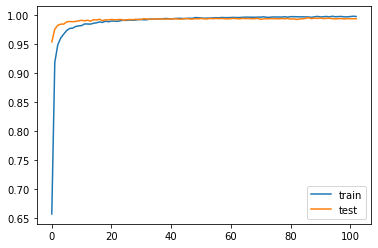

In [13]:
## plot acuuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [14]:
# load test data
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_input = s.transform(test_data)
test_input

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
# convert test data to to images
test_set = test_input.reshape(-1, 28, 28, 1)

In [16]:
# predict output
y_pred = model.predict(test_set)
y_output = np.argmax(y_pred, axis = 1)
y_output

array([2, 0, 9, ..., 3, 9, 2])

In [17]:
# load sample_submission
sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [18]:
# save the prediction
sub['Label'] = y_output
sub.to_csv('sample_submission_model3264128_80100.csv', index = False)

In [19]:
# load the predicted data
sub1 = pd.read_csv('./sample_submission_model3264128_80100.csv')
sub1.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


# **Submitting Model**

### **model accuracy on submission to Kaggle = 0.99300**